In [2]:
import rosbag_parser as rp
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
rosbag_path = "rosbag2_2024_10_22-13_25_55"
scan_topic = "/scan"
ackermann_cmd_topic = "/drive"
odom_topic = "/ego_racecar/odom"

print(rp.get_rosbag_topics(rosbag_path))

bag = {"scan": rp.read_rosbag_scan(rosbag_path, scan_topic),
       "odom": rp.read_rosbag_odom(rosbag_path, odom_topic)}

['/map_updates', '/goal_pose', '/rosout', '/parameter_events', '/cmd_vel', '/drive', '/tf', '/ego_racecar/odom', '/tf_static', '/ego_robot_description', '/joint_states', '/clock', '/initialpose', '/map', '/scan']


In [5]:
x = []
y = []
for i, val in enumerate(bag["odom"]):
    if np.isnan(val.pose.pose.position.x ) or np.isnan(val.pose.pose.position.y):
        continue
    x.append(val.pose.pose.position.x)
    y.append(val.pose.pose.position.y)

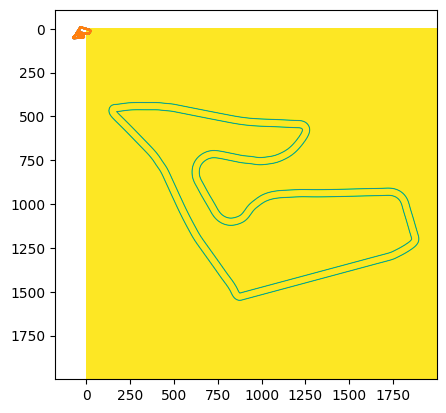

In [9]:
plt.plot(x, y)

im = plt.imread("../f1tenth_ws/src/maps/maps/Spielberg_map.png")
implot = plt.imshow(im)
plt.plot(x, y)
plt.show()